<a href="https://colab.research.google.com/github/raheymakhan/Paper/blob/main/Time_Frame_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Frame 03: After COVID-19 Vaccine Approval Date

### <u>DATA PREPARATION</u>

##### SETTING UP THE TWITTER API

In [ ]:
import os
import tweepy as tw
import pandas as pd

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

##### PREPARING THE COVID-19 VACCINE TWEETS DATASET (the dataset after Dec 11)

In [ ]:
'''
We are using 'snscrape' to collect the tweets.
For this package we will have to run the following commands in the command prompt/anaconda prompt of our computers:

snscrape twitter-search "#covid-19vaccine since:2020-12-11" > frame3_tweets1.txt
snscrape twitter-search "#COVID-19Vaccine since:2020-12-11" > frame3_tweets2.txt
snscrape twitter-search "#covidvaccine since:2020-12-11" > frame3_tweets3.txt
snscrape twitter-search "#coronavirusvaccine since:2020-12-11" > frame3_tweets4.txt
snscrape twitter-search "#coronavaccine since:2020-12-11" > frame3_tweets5.txt

Each command is run separately in the prompt and returns URL ids for the tweets in a text file.
Then we will use the following commands to extract the URL ids and finally the tweet texts from the text files.

Reference: https://medium.com/@jcldinco/downloading-historical-tweets-using-tweet-ids-via-snscrape-and-tweepy-5f4ecbf19032
'''

# Converting the text files into a single pandas dataframe.
tweet_url = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 03\frame3_tweets1.txt", index_col= None, header = None, names = ["links"])
tweet_url2 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 03\frame3_tweets2.txt", index_col= None, header = None, names = ["links"])
tweet_url3 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 03\frame3_tweets3.txt", index_col= None, header = None, names = ["links"])
tweet_url4 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 03\frame3_tweets4.txt", index_col= None, header = None, names = ["links"])
tweet_url5 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 03\frame3_tweets5.txt", index_col= None, header = None, names = ["links"])

tweet_url = tweet_url.append(tweet_url2, ignore_index=True)
tweet_url = tweet_url.append(tweet_url3, ignore_index=True)
tweet_url = tweet_url.append(tweet_url4, ignore_index=True)
tweet_url = tweet_url.append(tweet_url5, ignore_index=True)

# Splitting the URLs and getting the id of each tweet.
tweet_url['id'] = tweet_url.apply(lambda x: x["links"].split("/")[-1], axis=1)
# Saving the tweet ids in a list.
ids = tweet_url['id'].tolist()

# Defining function to get the text from each tweet.
def tweet_text(ids):
    tweet_status_list = api.statuses_lookup(ids, tweet_mode= "extended")
    text = pd.DataFrame()
    for status in tweet_status_list:
            tweet_text = {"tweet":status.full_text, "location": status.user.location}
            text = text.append(tweet_text, ignore_index = True)
    text.to_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 03\Vaccine Tweets (Time Frame 03).csv", mode="a")
    
# We divide our tweet ids into batches and run the above function on each batch. (Running on all the tweets ids together 
# raises error)
ids_count = len(ids)
batches = (ids_count - 1) // 50 + 1

for i in range(batches):
        batch = ids[i*50:(i+1)*50]
        result = tweet_text(batch)

covid_vaccine_data = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 03\Vaccine Tweets (Time Frame 03).csv")
del covid_vaccine_data['Unnamed: 0']
covid_vaccine_data = covid_vaccine_data[covid_vaccine_data.tweet != 'tweet']
covid_vaccine_data.head()

,location,tweet
0,"iPhone: 0.000000,0.000000",#Exclusive: #Acceptance of #COVID_19vaccine is...
1,NaN,Great speaking at Covid-19vaccine Q&amp;A even...
2,Mumbai | Delhi | Bangalore | Pune,Seychelles Offers Quarantine-free Travel To \n...
3,Mumbai,Vaccine side-effects will not result in death:...
4,"Mumbai, India",Covid-19 Vaccine: कोविड का टीका लेने वाले लोग...


##### TRANSLATING THE COVID-19 VACCINE TWEETS DATASET

In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Covid19 Research Project-2e4c32327232.json"

translated_tweets = []

def translate_text(target, tweet_list):
    import six
    from google.cloud import translate_v2 as translate
    translate_client = translate.Client()
    
    for text in tweet_list:
        if not text:
            translated_tweets.append("")
        elif len(text) < 4:
            translated_tweets.append("")
        else:
            if isinstance(text, six.binary_type):
                text = text.decode("utf-8")
    
            result = translate_client.translate(text, target_language=target)
            translated_tweets.append(u"{}".format(result["translatedText"]))

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

tweets_list = covid_vaccine_data['tweet'].values.tolist()
tweets_sublists = chunkIt(tweets_list, 50)

for i in range(50):
    translate_text('en', tweets_sublists[i])
    
covid_vaccine_data['Translated Tweet'] = translated_tweets
covid_vaccine_data.head()    

,location,tweet,Translated Tweet
0,"iPhone: 0.000000,0.000000",#Exclusive: #Acceptance of #COVID_19vaccine is...,#Exclusive: #Acceptance of #COVID_19vaccine is...
1,NaN,Great speaking at Covid-19vaccine Q&amp;A even...,Great speaking at Covid-19vaccine Q&amp;A even...
2,Mumbai | Delhi | Bangalore | Pune,Seychelles Offers Quarantine-free Travel To \n...,Seychelles Offers Quarantine-free Travel To \n...
3,Mumbai,Vaccine side-effects will not result in death:...,Vaccine side-effects will not result in death:...
4,"Mumbai, India",Covid-19 Vaccine: कोविड का टीका लेने वाले लोग...,Covid-19 Vaccine: People taking Kovid vaccine ...


##### CLEANING AND PREPROCESSING THE COVID-19 VACCINE TWEETS DATASET

In [ ]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
from googletrans import Translator
translator = Translator()
stop = stopwords.words('english')

def preprocess_word(tweet):
    processed_tweet = []
    words = tweet.split()
    for word in words:
        # Removing punctuation
        word = word.strip('\'"?!,.():;') 
        # Converting more than 2 letter repetitions to 2 letter e.g. funnnnny --> funny
        word = re.sub(r'(.)\1+', r'\1\1', word)  
        # Removing - & '
        word = re.sub(r'(-|\')', '', word)       
        processed_tweet.append(word)
    return ' '.join(processed_tweet)
    
covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Translated Tweet'].apply(lambda x: preprocess_word(x))

def is_valid_word(tweet):
    processed_tweet = []
    words = tweet.split()
    for word in words:
        # Checking if word begins with an alphabet
        if re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None:
            processed_tweet.append(word)
    return ' '.join(processed_tweet)

covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: is_valid_word(x))

def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: handle_emojis(x))

def preprocess_tweet(tweet):
    porter_stemmer = PorterStemmer()
    # Lower-casing
    tweet = tweet.lower()
    # Removing non-ascii characters i.e. characters with ascii value >= 128
    tweet = ''.join([w if ord(w) < 128 else ' ' for w in tweet])
    # Spelling correction
    tweet = str(TextBlob(tweet).correct())
    # Replacing URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    # Replacing @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    # Replacing #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Removing RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    # Replacing 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Stripping space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Replacing multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    # Removing stop words
    processed_tweet = []
    words = tweet.split()
    for word in words:
        if word not in stop:
            processed_tweet.append(word)
    return ' '.join(processed_tweet)

covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: preprocess_tweet(x))

covid_vaccine_data = covid_vaccine_data.dropna(subset=['Clean Tweet'])
covid_vaccine_data = covid_vaccine_data.reset_index()
del covid_vaccine_data['index']

# Removing empty rows
covid_vaccine_data['Clean Tweet'].replace("", np.nan, inplace=True)
covid_vaccine_data.dropna(subset=['Clean Tweet'], inplace=True)
covid_vaccine_data.head()

,location,tweet,Translated Tweet,Clean Tweet
0,"iPhone: 0.000000,0.000000",#Exclusive: #Acceptance of #COVID_19vaccine is...,#Exclusive: #Acceptance of #COVID_19vaccine is...,rising pessimism getting back normal via
1,NaN,Great speaking at Covid-19vaccine Q&amp;A even...,Great speaking at Covid-19vaccine Q&amp;A even...,great speaking covid19vaccine event led longer...
2,Mumbai | Delhi | Bangalore | Pune,Seychelles Offers Quarantine-free Travel To \n...,Seychelles Offers Quarantine-free Travel To \n...,seychelles offers quarantinefree travel
3,Mumbai,Vaccine side-effects will not result in death:...,Vaccine side-effects will not result in death:...,vaccine sideeffects result death aims director
4,"Mumbai, India",Covid-19 Vaccine: कोविड का टीका लेने वाले लोग...,Covid-19 Vaccine: People taking Kovid vaccine ...,covid19 vaccine people taking moved vaccine ta...


### <u>SENTIMENT ANALYSIS</u>

In [ ]:
from transformers import BertForPreTraining

from transformers import pipeline
classifier = pipeline('sentiment-analysis')
covid_vaccine_data['Sentiment'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: classifier(x))

def get_label(x):
    x = str(x)
    if 'POSITIVE' in x:
        return 'Positive'
    if 'NEGATIVE' in x:
        return 'Negative'

covid_vaccine_data['Sentiment'] = covid_vaccine_data['Sentiment'].apply(lambda x: get_label(x))
covid_vaccine_data.head()

,location,tweet,Translated Tweet,Clean Tweet,Sentiment
0,"iPhone: 0.000000,0.000000",#Exclusive: #Acceptance of #COVID_19vaccine is...,#Exclusive: #Acceptance of #COVID_19vaccine is...,rising pessimism getting back normal via,Negative
1,NaN,Great speaking at Covid-19vaccine Q&amp;A even...,Great speaking at Covid-19vaccine Q&amp;A even...,great speaking covid19vaccine event led longer...,Positive
2,Mumbai | Delhi | Bangalore | Pune,Seychelles Offers Quarantine-free Travel To \n...,Seychelles Offers Quarantine-free Travel To \n...,seychelles offers quarantinefree travel,Positive
3,Mumbai,Vaccine side-effects will not result in death:...,Vaccine side-effects will not result in death:...,vaccine sideeffects result death aims director,Negative
4,"Mumbai, India",Covid-19 Vaccine: कोविड का टीका लेने वाले लोग...,Covid-19 Vaccine: People taking Kovid vaccine ...,covid19 vaccine people taking moved vaccine ta...,Negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

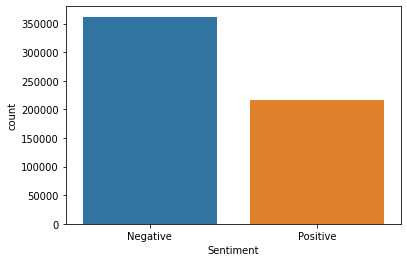

In [ ]:
# Plotting the distribution of sentiments
import seaborn as sns
import matplotlib as plt
sns.countplot(covid_vaccine_data['Sentiment'])

### <u>KEYWORD EXTRACTION</u>

In [ ]:
# Removing frequent words
high_freq = pd.Series(' '.join(covid_vaccine_data['Clean Tweet']).split()).value_counts()[:20]
high_freq = list(high_freq.index)
covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))

# Separating positive and negative tweets and keeping them in dataframes

df_positive = covid_vaccine_data[covid_vaccine_data['Sentiment'] == 'Positive'] 
df_negative = covid_vaccine_data[covid_vaccine_data['Sentiment'] == 'Negative'] 

##### POSITIVE TWEETS

In [ ]:
import yake
positive_tweets = df_positive['Clean Tweet'].to_list()
positive_text = ' '.join(positive_tweets)

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 50

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
positive_keywords = custom_kw_extractor.extract_keywords(positive_text)

for kw in positive_keywords:
    print(kw)

(6.052720793619983e-07, 'great read article')
(8.185309405693586e-07, 'worlds largest drive')
(9.324231457883679e-07, 'development great read')
(1.6110215157873914e-06, 'community healthcare team')
(1.640392514293755e-06, 'prime minister narendra')
(1.6481628000969108e-06, 'minister narendra mode')
(1.7455477738630703e-06, 'read article latest')
(1.9288291651216355e-06, 'great day science')
(2.1852737452912434e-06, 'drug development great')
(2.7981440653299774e-06, 'prime minister mode')
(2.850689914702403e-06, 'prime minister')
(2.90291067828914e-06, 'country safe protect')
(2.909386044854788e-06, 'coronavirus drug development')
(3.00948718504933e-06, 'country world approve')
(3.167758615847649e-06, 'shots shots shots')
(3.221045752069699e-06, 'good day')
(3.33853445242602e-06, 'great family day')
(3.3509483626274874e-06, 'healthcare team members')
(3.4774236884988112e-06, 'great day')
(3.5095514136763555e-06, 'day good day')
(3.5897237037897513e-06, 'person world receive')
(3.6088330

##### NEGATIVE TWEETS

In [ ]:
negative_tweets = df_negative['Clean Tweet'].to_list()
negative_text = ' '.join(negative_tweets)

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 50

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
negative_keywords = custom_kw_extractor.extract_keywords(negative_text)

for kw in negative_keywords:
    print(kw)

(1.1487299119410414e-06, 'side effects')
(2.3702132171069715e-06, 'million doses')
(4.197738550143991e-06, 'total virus country')
(4.306469984454573e-06, 'doses')
(4.845633832215971e-06, 'healthcare workers')
(5.193893304019418e-06, 'nos contact turn')
(6.032895376391551e-06, 'day')
(6.50346722931022e-06, 'adverse side effects')
(6.821454502073235e-06, 'contact turn receive')
(6.858604286792117e-06, 'front line workers')
(7.575519740416245e-06, 'care workers')
(7.735557319764733e-06, 'workers frontline workers')
(7.760182944143128e-06, 'workers')
(7.955266750044524e-06, 'government')
(8.173720793175017e-06, 'days')
(8.427165639062181e-06, 'started year country')
(8.788819868159845e-06, 'time')
(8.824138756618399e-06, 'side effects reported')
(9.173308215186097e-06, 'work wait years')
(9.39488965667238e-06, 'million doses administered')
(9.450937160771613e-06, 'million shots days')
(9.467076975523058e-06, 'country')
(9.727185379451216e-06, 'prime minister')
(9.768056272336988e-06, 'mini

### <u>TOPIC MODELING</u>

##### POSITIVE TWEETS

In [ ]:
from bertopic import BERTopic

positive_tweets = df_positive['Clean Tweet'].tolist()
positive_tweets = [str(i) for i in positive_tweets]

model = BERTopic(language="english")
topics, probs = model.fit_transform(positive_tweets)
model.update_topics(positive_tweets, topics, n_gram_range=(1, 3))

print('The 10 most frequent topics in positive tweets are:','\n')
print(model.get_topic_freq().head(11))
print('\n')

print('Topic 01:', model.get_topic(8)[:10],'\n')
print('Topic 02:', model.get_topic(1)[:10],'\n')
print('Topic 03:', model.get_topic(232)[:10],'\n')
print('Topic 04:', model.get_topic(52)[:10],'\n')
print('Topic 05:', model.get_topic(105)[:10],'\n')
print('Topic 06:', model.get_topic(9)[:10],'\n')
print('Topic 07:', model.get_topic(23)[:10],'\n')
print('Topic 08:', model.get_topic(521)[:10],'\n')
print('Topic 09:', model.get_topic(34)[:10],'\n')
print('Topic 10:', model.get_topic(92)[:10],'\n')

model.visualize_topics()

##### NEGATIVE TWEETS

In [ ]:
negative_tweets = df_negative['Clean Tweet'].tolist()
negative_tweets = [str(i) for i in negative_tweets]

model = BERTopic(language="english")
topics, probs = model.fit_transform(negative_tweets)
model.update_topics(negative_tweets, topics, n_gram_range=(1, 3))

print('The 10 most frequent topics in negative tweets are:','\n')
print(model.get_topic_freq().head(11))
print('\n')

print('Topic 01:', model.get_topic(4)[:10],'\n')
print('Topic 02:', model.get_topic(744)[:10],'\n')
print('Topic 03:', model.get_topic(307)[:10],'\n')
print('Topic 04:', model.get_topic(151)[:10],'\n')
print('Topic 05:', model.get_topic(452)[:10],'\n')
print('Topic 06:', model.get_topic(914)[:10],'\n')
print('Topic 07:', model.get_topic(2)[:10],'\n')
print('Topic 08:', model.get_topic(461)[:10],'\n')
print('Topic 09:', model.get_topic(349)[:10],'\n')
print('Topic 10:', model.get_topic(1250)[:10],'\n')

model.visualize_topics()

### <u>ANALYZING SENTIMENTS IN DIFFERENT COUNTRIES AND COMPARING TO NO. OF REPORTED CASES</u>

##### GETTING COUNTRY OF EACH TWEET

In [ ]:
# Getting country of each tweet

from geopy.geocoders import Nominatim

def get_country(x):       
    geolocator = Nominatim(user_agent = "geoapiExercises")
    location = geolocator.geocode(x)
    return str(location).rsplit(', ')[-1]

locations = covid_vaccine_data['location'].unique().tolist()
countries = []

for location in locations:
    try:
        countries.append(get_country(location))
    except:
        countries.append('Country Not Recognized')
        
dict_1 = dict(zip(locations, countries))
covid_vaccine_data['Country'] = covid_vaccine_data['location'].map(dict_1)
covid_vaccine_data['Country'] = covid_vaccine_data['Country'].apply(lambda x: x.replace('United States of America', 'United States'))
covid_vaccine_data = covid_vaccine_data[covid_vaccine_data.Country != 'None']
covid_vaccine_data = covid_vaccine_data[covid_vaccine_data.Country != 'Country Not Recognized']

covid_vaccine_data['Country'] = covid_vaccine_data['Country'].replace({'Amman': 'Jordan',
                                                       'Ascension and Tristan da Cunha': 'United Kingdom',
                                                       'Bermuda': 'United Kingdom',
                                                       'Cayman Islands': 'United Kingdom',
                                                       'Democratic Republic of Congo': 'Congo',
                                                       'Falkland Islands': 'United Kingdom',
                                                       'Free Kashmir': 'Pakistan',
                                                       'Føroyar': 'United Kingdom',
                                                       'Gibraltar': 'United Kingdom',
                                                       'Guernsey': 'United Kingdom',
                                                       'Hellas': 'Greece',
                                                       'Isle of Man': 'United Kingdom',
                                                       'Jersey': 'United Kingdom',
                                                       'Kalaallit Nunaat.': 'Denmark',
                                                       'Luzon': 'Philippines',
                                                       'Stratford': 'United Kingdom',
                                                       'Turks and Caicos Islands': 'United Kingdom',
                                                       'Vatican CITY': 'Vatican'})

covid_vaccine_data.head()

,location,tweet,Translated Tweet,Clean Tweet,Sentiment,Country
1,NaN,Great speaking at Covid-19vaccine Q&amp;A even...,Great speaking at Covid-19vaccine Q&amp;A even...,great speaking covid19vaccine event led longer...,Positive,Italia
3,Mumbai,Vaccine side-effects will not result in death:...,Vaccine side-effects will not result in death:...,sideeffects result death aims director,Negative,India
4,"Mumbai, India",Covid-19 Vaccine: कोविड का टीका लेने वाले लोग...,Covid-19 Vaccine: People taking Kovid vaccine ...,taking moved special care days make mistakes c...,Negative,India
5,Washington D.C.,#PresidentBiden gets offer from #Amazon to hel...,#PresidentBiden gets offer from #Amazon to hel...,gets offer help,Positive,United States
6,Hyderabad,Bengaluru: 47% of designated beneficiaries vac...,Bengaluru: 47% of designated beneficiaries vac...,bengaluru designate beneficiaries tuesday state,Positive,India


##### COUNTRY ANALYSIS

In [ ]:
# Getting the total COVID-19 cases data for each country till the end date of our time frame i.e. Dec 11.

country_cases = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Cases Data\owid-covid-data.csv")
country_cases = country_cases[country_cases['date'] == '2021-02-28']
country_cases = country_cases[['location', 'total_cases']]
country_cases = country_cases.rename(columns={"location": "Country"})

# Getting the sentiments of countries regarding the COVID-19 vaccine.

countries = covid_vaccine_data['Country'].unique().tolist()

country_positives = []
country_negatives = []

for country in countries:
    country_tweets = covid_vaccine_data[covid_vaccine_data.Country == country]
    
    country_positive = country_tweets[country_tweets['Sentiment'] == 'Positive']
    country_positives.append(len(country_positive))
    
    country_negative = country_tweets[country_tweets['Sentiment'] == 'Negative']
    country_negatives.append(len(country_negative))
    
df_country = pd.DataFrame({'Country': countries, 'Count of Positive Tweets': country_positives, 
                           'Count of Negative Tweets': country_negatives})

from google_trans_new import google_translator 
translator = google_translator()
df_country['Country'] = df_country['Country'].apply(lambda x: translator.translate(x))
df_country['Country'] = df_country['Country'].apply(lambda x: x.rstrip())

df_country['Country'] = df_country['Country'].replace({'Algérie / ⵍⵣⵣⴰⵢⴻⵔ / Algeria': 'Algeria',
                                'Belgium / Belgique / Belgien': 'Belgium', 
                                'Bosnia and Herzegovina / Bosnia and Herzegovina': 'Bosnia and Herzegovina', 
                                'Burkina Faso.': 'Burkina Faso', 
                                'Cyprus - Cyprus': 'Cyprus',
                                'Denmark.': 'Denmark', 
                                'Djibouti Djibouti': 'Djibouti',
                                'Eritrera Eritrea إرتريا': 'Eritrea', 
                                'Guinea Bissau': 'Guinea-Bissau',                 
                                'Iraq / Arak': 'Iraq',
                                'Ireland / Ireland.': 'Ireland',                       
                                'Kingdom of Cambodia': 'Cambodia',
                                'Kosovo / Kosovo.': 'Kosovo',
                                'Maroc / ⵍⵎⵖⵔⵉⴱ / Morocco': 'Morocco',               
                                'Moldavia': 'Moldova',               
                                'Montenegro / Montenegro': 'Montenegro',
                                'New Zealand / New Zealand': 'New Zealand',
                                'Northern Macedonia': 'North Macedonia',               
                                'Palestinian Territory': 'Palestine',
                                'Papua niugini': 'Papua New Guinea',               
                                'Republic of Korea': 'South Korea',
                                'Saudi': 'Saudi Arabia',
                                'Schweiz / Suisse / Switzerland / Switzerland': 'Switzerland',
                                'Sierra Leone.': 'Sierra Leone',               
                                'Somalia الصومال': 'Somalia',
                                'Sri Lanka Run': 'Sri Lanka',
                                'Suomi Finland': 'Finland',      
                                'Tchad Chad': 'Chad',
                                'The Bahamas': 'Bahamas',
                                'The Netherlands': 'Netherlands',
                                'The United Arab Emirates': 'United Arab Emirates',
                                'chili': 'Chile',
                                'འབྲུག་ འབྲུག་': 'Bhutan'})

df_country = df_country[df_country.Country != 'Africa']
df_country = df_country[df_country.Country != 'Antarctica']
df_country = df_country[df_country.Country != 'Asia']
df_country = df_country[df_country.Country != 'Atlantic Ocean']
df_country = df_country[df_country.Country != 'Bamboo']
df_country = df_country[df_country.Country != 'Belau']
df_country = df_country[df_country.Country != 'Benign']
df_country = df_country[df_country.Country != 'Bermuda Triangle']
df_country = df_country[df_country.Country != 'Democratic Arab Republic']
df_country = df_country[df_country.Country != 'Europe']
df_country = df_country[df_country.Country != 'Gulf of California']
df_country = df_country[df_country.Country != 'Gulf of Mexico']
df_country = df_country[df_country.Country != 'Indian Ocean']
df_country = df_country[df_country.Country != 'Inebria']
df_country = df_country[df_country.Country != 'Ivory Coast']
df_country = df_country[df_country.Country != 'Mariana Trench National Wildlife Refuge']
df_country = df_country[df_country.Country != 'North America']
df_country = df_country[df_country.Country != 'North Pole']
df_country = df_country[df_country.Country != "O'zbekon"]
df_country = df_country[df_country.Country != 'Oceania']
df_country = df_country[df_country.Country != 'Pacific Ocean']
df_country = df_country[df_country.Country != 'Red Sea ቀይሕ ባሕሪ Red Sea;']
df_country = df_country[df_country.Country != 'Seyter']
df_country = df_country[df_country.Country != 'South America']
df_country = df_country[df_country.Country != 'South Pole']
df_country = df_country[df_country.Country != 'THE MOST KNOW ᠮᠤᠩᠭᠤᠯ ᠤᠯᠤᠰ']
df_country = df_country[df_country.Country != "The Democratic People's Republic of Korea"]
df_country = df_country[df_country.Country != 'The Mediterranean Sea']
df_country = df_country[df_country.Country != 'The Savior']
df_country = df_country[df_country.Country != "Timór Lorosa'e"]
df_country = df_country[df_country.Country != 'To whom']
df_country = df_country[df_country.Country != 'Tonga']
df_country = df_country[df_country.Country != 'Tuvalu']
df_country = df_country[df_country.Country != 'Vide']
df_country = df_country[df_country.Country != 'in the tattoo']
df_country = df_country[df_country.Country != 'the two seas']
df_country = df_country[df_country.Country != 'year']
df_country = df_country.reset_index()

country_sentiment = []

for i in range(len(df_country)):
    if df_country['Count of Positive Tweets'][i] > df_country['Count of Negative Tweets'][i]:
        country_sentiment.append('Positive')
    else:
        country_sentiment.append('Negative')

df_country['Sentiment'] = country_sentiment

# Merging the total cases and country sentiments dataframes

df_country = df_country.merge(country_cases, on="Country", how = 'inner')
del df_country['index']
df_country.head()

,Country,Count of Positive Tweets,Count of Negative Tweets,Sentiment,total_cases
0,Italy,43570,74686,Negative,2925265.0
1,India,36768,74871,Negative,11112241.0
2,United States,56147,86144,Negative,28578548.0
3,France,867,2015,Negative,3815639.0
4,Spain,545,1092,Negative,3188553.0


In [ ]:
# Looking at sentiments of 10 countries with least number of cases

df_country_sorted = df_country.sort_values(by=['total_cases'])
df_country_sorted.head(10)

,Country,Count of Positive Tweets,Count of Negative Tweets,Sentiment,total_cases
155,Vanuatu,3,2,Positive,1.0
81,Samoa,3,5,Negative,3.0
157,Vatican,6,1,Positive,27.0
147,Saint Kitts and Nevis,3,4,Negative,41.0
140,Laos,9,4,Positive,45.0
158,Grenada,0,2,Negative,148.0
66,Tanzania,24,35,Negative,509.0
104,Mauritius,7,5,Positive,610.0
96,Cambodia,4,23,Negative,820.0
139,Bhutan,2,2,Negative,867.0


In [ ]:
# Looking at sentiments of 10 countries with most number of cases

df_country_sorted.tail(10)

,Country,Count of Positive Tweets,Count of Negative Tweets,Sentiment,total_cases
13,Germany,769,1630,Negative,2450295.0
11,Turkey,489,1255,Negative,2701588.0
0,Italy,43570,74686,Negative,2925265.0
4,Spain,545,1092,Negative,3188553.0
3,France,867,2015,Negative,3815639.0
6,United Kingdom,32901,41856,Negative,4188827.0
83,Russia,76,119,Negative,4198400.0
57,Brazil,523,817,Negative,10551259.0
1,India,36768,74871,Negative,11112241.0
2,United States,56147,86144,Negative,28578548.0


In [ ]:
print('The number of countries with positive sentiment are:', len(df_country[df_country.Sentiment == 'Positive']))
print('The number of countries with negative sentiment are:', len(df_country[df_country.Sentiment == 'Negative']))

The number of countries with positive sentiment are: 19
The number of countries with negative sentiment are: 142


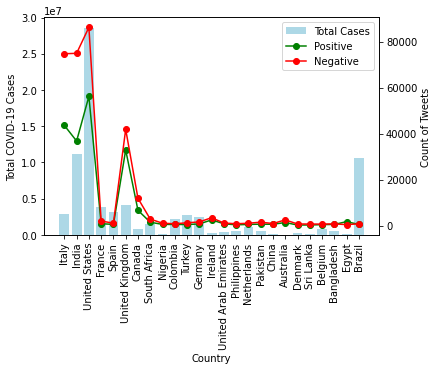

In [ ]:
df_high_counts = df_country[df_country['Total Number of Tweets'] > 1000]
df_low_counts = df_country[df_country['Total Number of Tweets'] <= 1000].sort_values(by=['Country'])

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df_high_counts['Country'], df_high_counts['total_cases'], color="#ADD8E6", label = 'Total Cases')
ax.set_xlabel('Country')
ax.set_ylabel('Total COVID-19 Cases')
plt.xticks(rotation=90)

ax2=ax.twinx()
ax2.plot(df_high_counts['Country'], df_high_counts['Count of Positive Tweets'], color="green", marker="o", label = 'Positive')
ax2.plot(df_high_counts['Country'], df_high_counts['Count of Negative Tweets'], color="red", marker="o", label = 'Negative')
ax2.set_ylabel('Count of Tweets')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

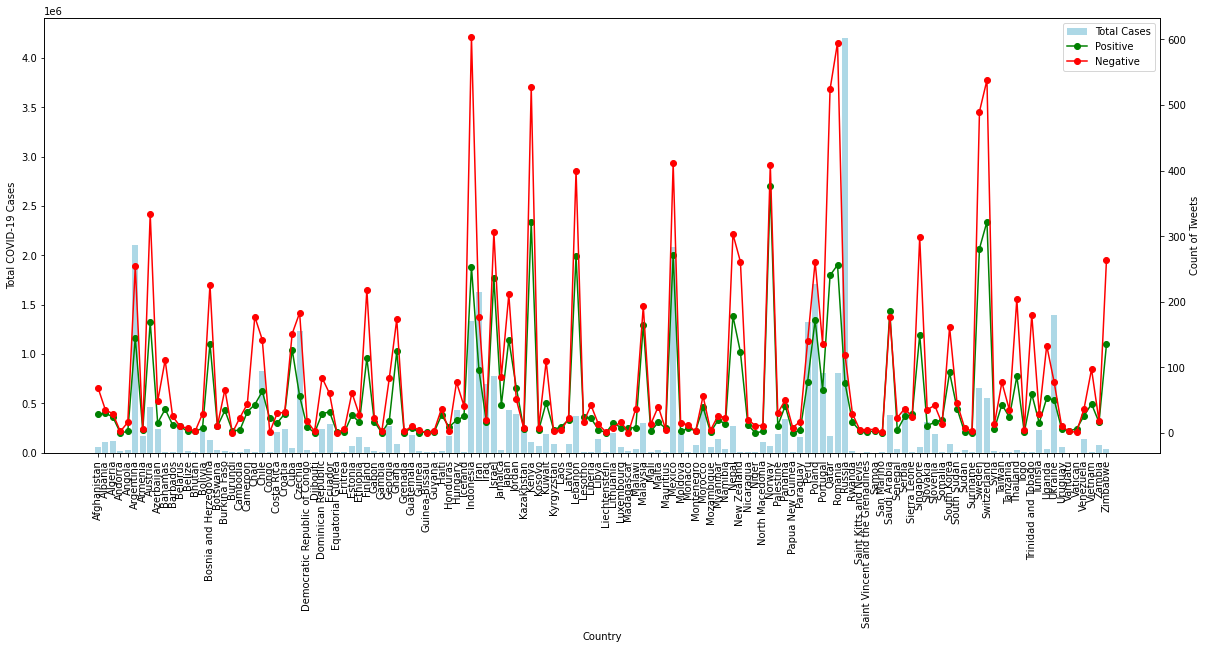

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.bar(df_low_counts['Country'], df_low_counts['total_cases'], color="#ADD8E6", label = 'Total Cases')

ax.set_xlabel('Country')
ax.set_ylabel('Total COVID-19 Cases')
plt.xticks(rotation=90)

ax2=ax.twinx()
ax2.plot(df_low_counts['Country'], df_low_counts['Count of Positive Tweets'], color="green", marker="o", label = 'Positive')
ax2.plot(df_low_counts['Country'], df_low_counts['Count of Negative Tweets'], color="red", marker="o", label = 'Negative')
ax2.set_ylabel('Count of Tweets')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

### <u>ANALYZING SENTIMENTS IN DIFFERENT USA STATES AND COMPARING TO NO. OF REPORTED CASES</u>

##### GETTING STATE OF EACH TWEET FROM USA

In [ ]:
# Separating USA data

usa_vaccine_data = covid_vaccine_data[covid_vaccine_data['Country'] == 'United States']

# Getting state of each tweet

import string

def get_state(x):       
    geolocator = Nominatim(user_agent = "geoapiExercises")
    location = geolocator.geocode(x)
    a = str(location).rsplit(', ')
    a = [''.join(x for x in i if not x.isdigit()) for i in a] 
    a = [''.join(x for x in i if x not in string.punctuation) for i in a]
    a = [x for x in a if len(x) > 1]
    a = [i for i in a if i] 
    return a[-2]

locations = usa_vaccine_data['location'].unique().tolist()
states = []

for location in locations:
    try:
        states.append(get_state(location))
    except:
        states.append('State Not Recognized')
        
dict_2 = dict(zip(locations, states))
usa_vaccine_data['State'] = usa_vaccine_data['location'].map(dict_2)
usa_vaccine_data = usa_vaccine_data[usa_vaccine_data.State != 'None']
usa_vaccine_data = usa_vaccine_data[usa_vaccine_data.State != 'State Not Recognized']

usa_vaccine_data.head()

<ipython-input-70-b25bfe7454fa>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_vaccine_data['State'] = usa_vaccine_data['location'].map(dict_2)


,location,tweet,Translated Tweet,Clean Tweet,Sentiment,Country,State
5,Washington D.C.,#PresidentBiden gets offer from #Amazon to hel...,#PresidentBiden gets offer from #Amazon to hel...,gets offer help,Positive,United States,District of Columbia
16,New Jersey - NJ,In honor of #MLKDay VNA Health Group's Spiritu...,In honor of #MLKDay VNA Health Group's Spiritu...,honor van groups spiritual counselor chaplain ...,Positive,United States,New Jersey
25,"Ridgewood ,NJ",Bergen County #COVID-19Vaccine Appointments ar...,Bergen County #COVID-19Vaccine Appointments ar...,county appointments currently filled,Positive,United States,New Jersey
28,"Wisconsin, USA",Here's how #MilwaukeeCounty residents ages 65 ...,Here's how #MilwaukeeCounty residents ages 65 ...,residents ages older sign appointments via,Negative,United States,Wisconsin
47,"Danvers, MA",Switzerland authorizes Moderna's mRNA #COVID-1...,Switzerland authorizes Moderna's mRNA #COVID-1...,switzerland authorized modern man month swiss ...,Negative,United States,Massachusetts


##### STATE ANALYSIS

In [ ]:
# Getting the total COVID-19 cases data for each country till the end date of our time frame i.e. Dec 11.

state_cases = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Cases Data\us-states.csv")
state_cases = state_cases[state_cases['date'] == '2021-02-28']
state_cases = state_cases[['state', 'cases']]

# Getting the sentiments of states regarding the COVID-19 vaccine.

us_states = usa_vaccine_data['State'].unique().tolist()

state_positives = []
state_negatives = []

for state in us_states:
    state_tweets = usa_vaccine_data[usa_vaccine_data.State == state]
    
    state_positive = state_tweets[state_tweets['Sentiment'] == 'Positive']
    state_positives.append(len(state_positive))
    
    state_negative = state_tweets[state_tweets['Sentiment'] == 'Negative']
    state_negatives.append(len(state_negative))
    
df_us_state = pd.DataFrame({'state': us_states, 'Count of Positive Tweets': state_positives, 
                            'Count of Negative Tweets': state_negatives})

state_sentiment = []

for i in range(len(df_us_state)):
    if df_us_state['Count of Positive Tweets'][i] > df_us_state['Count of Negative Tweets'][i]:
        state_sentiment.append('Positive')
    else:
        state_sentiment.append('Negative')

df_us_state['Sentiment'] = state_sentiment

# Merging the total cases and country sentiments dataframes

df_us_state = df_us_state.merge(state_cases, on="state", how = 'inner')
df_us_state.head()

,state,Count of Positive Tweets,Count of Negative Tweets,Sentiment,cases
0,District of Columbia,1984,3275,Negative,40598
1,New Jersey,1278,1861,Negative,789354
2,Wisconsin,628,929,Negative,617380
3,Massachusetts,2342,3120,Negative,581148
4,California,6432,10408,Negative,3568991


In [ ]:
# Looking at sentiments of 10 states with least number of cases

df_state_sorted = df_us_state.sort_values(by=['cases'])
df_state_sorted.head(10)

,state,Count of Positive Tweets,Count of Negative Tweets,Sentiment,cases
52,Northern Mariana Islands,1,9,Negative,143
53,Guam,3,2,Positive,8705
44,Vermont,133,196,Negative,15198
17,Hawaii,110,245,Negative,27473
0,District of Columbia,1984,3275,Negative,40598
40,Maine,182,284,Negative,44634
51,Wyoming,93,152,Negative,54394
46,Alaska,111,152,Negative,57846
19,New Hampshire,196,398,Negative,75424
48,Delaware,217,286,Negative,86799


In [ ]:
# Looking at sentiments of 10 states with most number of cases

df_state_sorted.tail(10)

,state,Count of Positive Tweets,Count of Negative Tweets,Sentiment,cases
6,Arizona,1007,1699,Negative,817232
20,North Carolina,1661,2161,Negative,862635
14,Pennsylvania,2252,3106,Negative,935911
7,Ohio,1978,2836,Negative,967422
32,Georgia,1232,2246,Negative,981844
9,Illinois,2370,3305,Negative,1189922
5,New York,6285,9052,Negative,1644124
16,Florida,2427,4414,Negative,1909213
15,Texas,4657,7087,Negative,2653285
4,California,6432,10408,Negative,3568991


In [ ]:
print('The number of US States with positive sentiment are:', len(df_us_state[df_us_state.Sentiment == 'Positive']))
print('The number of US States with negative sentiment are:', len(df_us_state[df_us_state.Sentiment == 'Negative']))

The number of US States with positive sentiment are: 2
The number of US States with negative sentiment are: 52


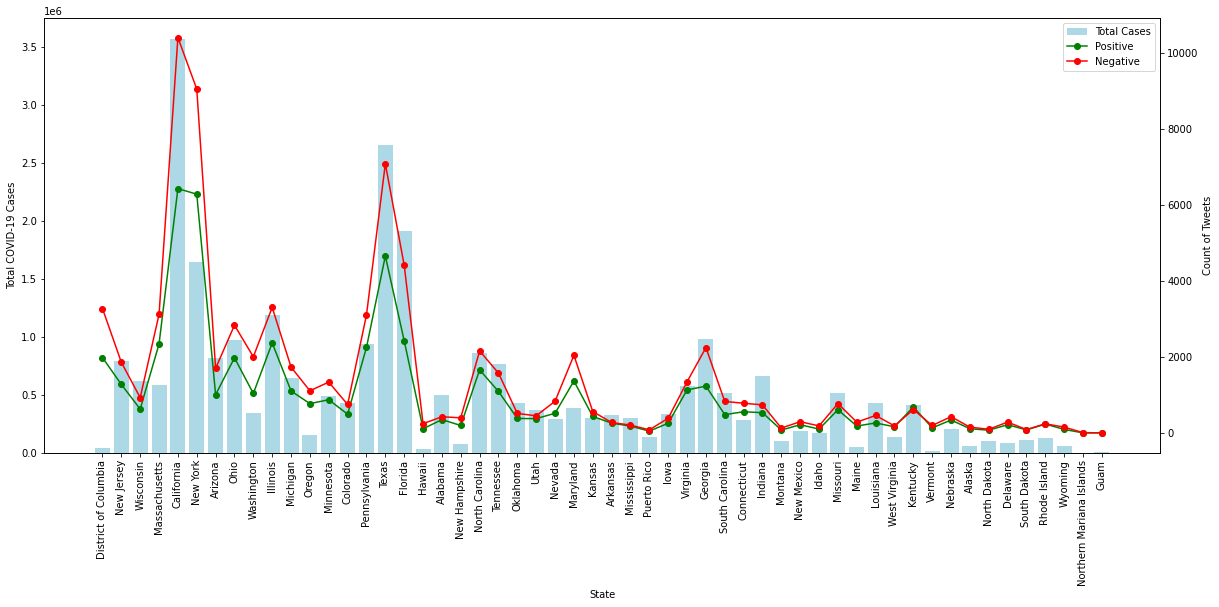

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.bar(df_us_state['state'], df_us_state['cases'], color="#ADD8E6", label = 'Total Cases')
ax.set_xlabel('State')
ax.set_ylabel('Total COVID-19 Cases')
plt.xticks(rotation=90)

ax2=ax.twinx()
ax2.plot(df_us_state['state'], df_us_state['Count of Positive Tweets'], color="green", marker="o", label = 'Positive')
ax2.plot(df_us_state['state'], df_us_state['Count of Negative Tweets'], color="red", marker="o", label = 'Negative')
ax2.set_ylabel('Count of Tweets')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()